# Herzfehler Prognose
## Binäre Klassifikation
### Daten Laden


In [78]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [79]:
df = pd.read_csv("../Heart Failure/data/heart.csv")

### Datenqualität

In [80]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [81]:
df.shape

(918, 12)

In [82]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [84]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [85]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Daten grobe Formatierung

In [86]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [87]:
df.columns = ["Alter", "Geschlecht", "Typ_Burstschmerz", "Ruhender_Blutdruck", "Cholesterin", "Nüchterner_Blutzucker", "Ruhe-EKG", "Max_Herzrate", "ExcerciseAgina", "Oldpeak", "ST_Steigung", "Herzversagen"]

### Daten verstehen

In [88]:
df.head()

,Alter,Geschlecht,Typ_Burstschmerz,Ruhender_Blutdruck,Cholesterin,Nüchterner_Blutzucker,Ruhe-EKG,Max_Herzrate,ExcerciseAgina,Oldpeak,ST_Steigung,Herzversagen
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [128]:
selected_columns = df.columns[:-1]

# Sortieren Sie den DataFrame, sodass die Werte mit Herzkrankheit = 1 zuerst kommen
df = df.sort_values(by='Herzversagen', ascending=False)

color_map = {0: 'red', 1: 'blue'}  # Rot für 0, Blau für 1

for attribut in selected_columns:
    fig = px.histogram(df, x=attribut, title=f"Histogramm von {attribut}", 
                       color='Herzversagen', opacity=0.8, barmode='overlay',
                       color_discrete_map=color_map)  # Definiere die Farben
    fig.show()


In [90]:
#Anzahl von Kranken und Gesunden
grouped_krankheiten = df.groupby(by="Herzversagen")
grouped_krankheiten["Herzversagen"].count()

Herzversagen
0    410
1    508
Name: Herzversagen, dtype: int64

<Axes: >

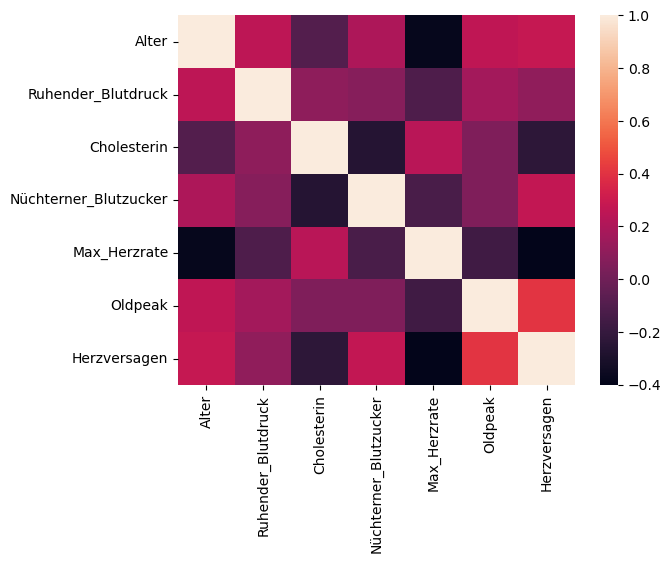

In [91]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)

### Daten für Modelling formatieren

In [92]:
#Libs
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [93]:
#Zielvariable definieren
X = df.drop("Herzversagen", axis=1)
y = df["Herzversagen"]

In [94]:
X.head()

,Alter,Geschlecht,Typ_Burstschmerz,Ruhender_Blutdruck,Cholesterin,Nüchterner_Blutzucker,Ruhe-EKG,Max_Herzrate,ExcerciseAgina,Oldpeak,ST_Steigung
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [95]:
kategorische_spalten = ["Geschlecht", "Typ_Burstschmerz", "Ruhe-EKG", "Max_Herzrate", "ExcerciseAgina", "Oldpeak", "ST_Steigung"]
# Wandle kategorische Daten um
label_encoders = {}
for col in kategorische_spalten:
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col])
    label_encoders[col] = encoder  # Speichere den Encoder, falls du ihn später benötigst


In [96]:
# Normalisierung der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
# Aufteilung in Trainings- und Testdaten
X_train_scal, X_test_scal, y_train_scal, y_test_scal = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [98]:
# Ausgabe der Dimensionen der Trainings- und Testdaten
print("Trainingsdaten Größe:", X_train_scal.shape)
print("Testdaten Größe:", X_train_scal.shape)

Trainingsdaten Größe: (734, 11)
Testdaten Größe: (734, 11)


### Logistische Regression

In [99]:
#Bibliotheken
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [101]:
# Erstellen und Trainieren des logistischen Regressionsmodells
model_lgr = LogisticRegression()
model_lgr.fit(X_train_scal, y_train_scal)

LogisticRegression()

In [102]:
# Vorhersagen auf Testdaten
y_pred_log = model_lgr.predict(X_test_scal)

In [103]:
conf_matrix_lg = confusion_matrix(y_test_scal, y_pred_log)
print("Konfusionsmatrix:\n", conf_matrix_lg)

Konfusionsmatrix:
 [[68  9]
 [20 87]]


In [104]:
import seaborn as sns

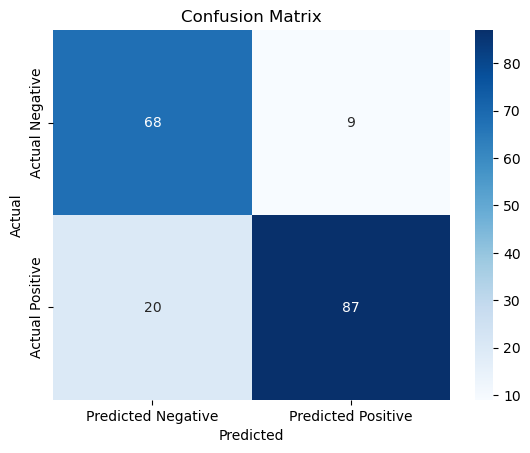

In [105]:
# Erstellung einer Heatmap zur visuellen Darstellung der Konfusionsmatrix
sns.heatmap(conf_matrix_lg, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [106]:
# Bewertung des Modells
accuracy = accuracy_score(y_test_scal, y_pred_log)
print("Genauigkeit:", accuracy)

Genauigkeit: 0.842391304347826


In [107]:
class_report = classification_report(y_test_scal, y_pred_log)
print("Klassifikationsbericht:\n", class_report)

Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



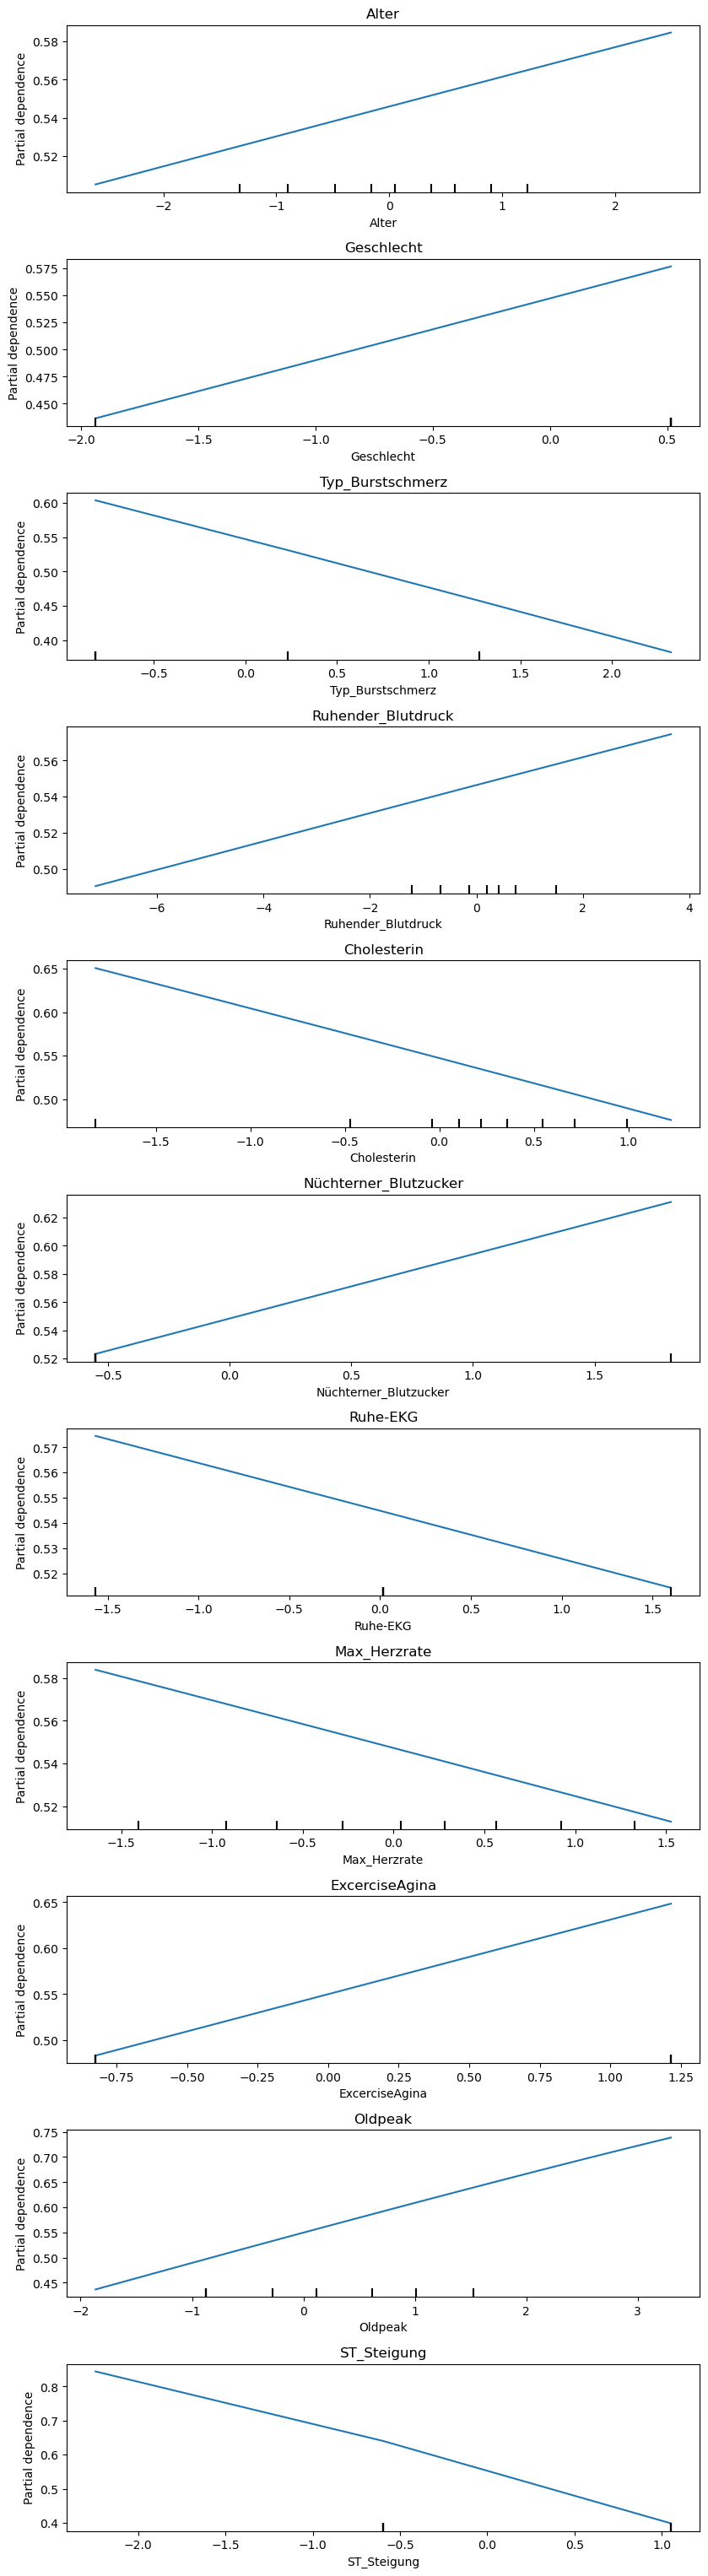

In [108]:
# Ihre Feature-Namen
feature_names = ['Alter', 'Geschlecht', 'Typ_Burstschmerz', 'Ruhender_Blutdruck',
       'Cholesterin', 'Nüchterner_Blutzucker', 'Ruhe-EKG', 'Max_Herzrate',
       'ExcerciseAgina', 'Oldpeak', 'ST_Steigung']

# Plot der Partial Dependence Plots
fig_width = 10  # Breite des Plots
fig_height_per_subplot = 3  # Höhe pro Subplot
fig, ax = plt.subplots(len(feature_names), 1, figsize=(fig_width, fig_height_per_subplot * len(feature_names)))

# Erzeugen der Partial Dependence Plots
for i, feature in enumerate(feature_names):
    disp = PartialDependenceDisplay.from_estimator(model_lgr, X_train_scal, features=[i],
                                                   feature_names=feature_names, ax=ax[i])
    ax[i].set_ylabel('')  # Entfernen der y-Achsen-Beschriftung
    ax[i].set_title(feature)  # Setzen des Feature-Namens als Titel

# Anpassung des Layouts
fig.subplots_adjust(top=0.95, bottom=0.05, left=0.2, right=0.95, hspace=0.4, wspace=0.2)

plt.show()

### Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
X.head()

,Alter,Geschlecht,Typ_Burstschmerz,Ruhender_Blutdruck,Cholesterin,Nüchterner_Blutzucker,Ruhe-EKG,Max_Herzrate,ExcerciseAgina,Oldpeak,ST_Steigung
0,40,1,1,140,289,0,1,98,0,10,2
1,49,0,2,160,180,0,1,82,0,20,1
2,37,1,1,130,283,0,2,25,0,10,2
3,48,0,0,138,214,0,1,34,1,25,1
4,54,1,2,150,195,0,1,48,0,10,2


In [111]:
# Aufteilung in Trainings- und Testdaten
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
model_rf = RandomForestClassifier(max_depth=3, random_state=10)

In [113]:
model_rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=3, random_state=10)

In [114]:
y_pred_rf = model_rf.predict(X_test_rf)

In [115]:
accuracy_score(y_test_rf,y_pred_rf)

0.8695652173913043

In [116]:
confusion_matrix(y_test_rf, y_pred_rf)

array([[67, 10],
       [14, 93]])

In [117]:
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
print("Konfusionsmatrix:\n", conf_matrix_lg)

Konfusionsmatrix:
 [[68  9]
 [20 87]]


In [118]:
class_report = classification_report(y_test_rf, y_pred_rf)
print("Klassifikationsbericht:\n", class_report)

Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



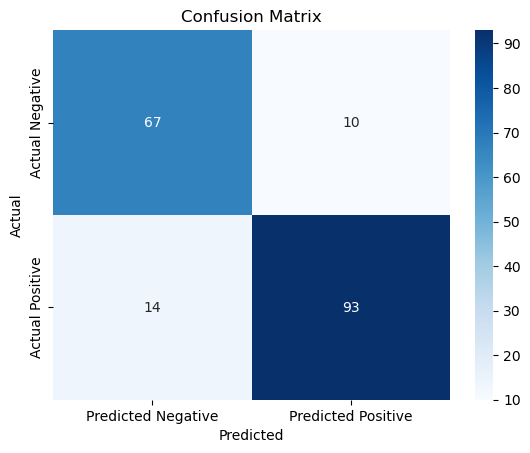

In [119]:
# Erstellung einer Heatmap zur visuellen Darstellung der Konfusionsmatrix
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

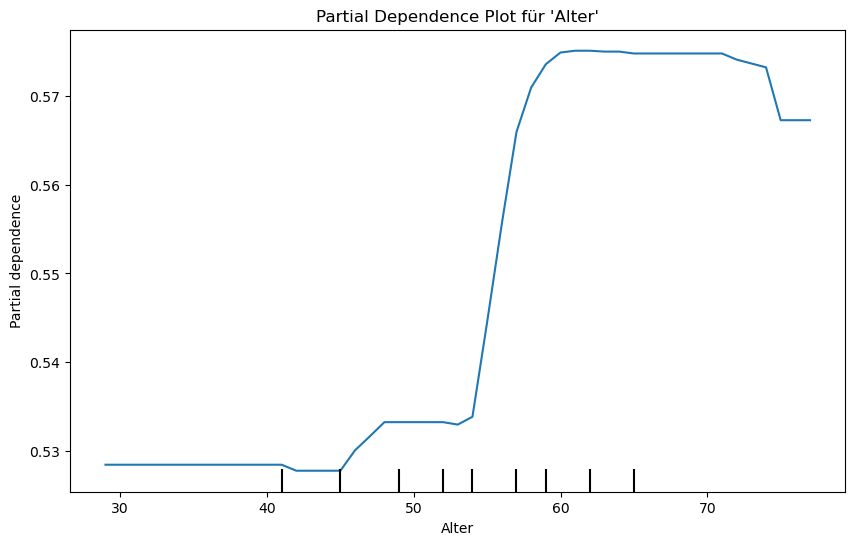

In [133]:

# Ihre Feature-Namen
feature_names = ["Alter", "Geschlecht", "Typ_Brustschmerz", "Ruhender_Blutdruck", "Cholesterin", "Nüchterner_Blutzucker", "Ruhe-EKG", "Max_Herzrate", "ExcerciseAngina", "Oldpeak", "ST_Steigung"]

# Indizes des Features "Alter" in der Liste der Feature-Namen
feature_index = feature_names.index("Alter")

# Erstellung des Partial Dependence Plots für das Feature "Alter"
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    model_rf, X_train_rf, features=[feature_index],
    feature_names=feature_names, ax=ax)

ax.set_title("Partial Dependence Plot für 'Alter'")
plt.show()


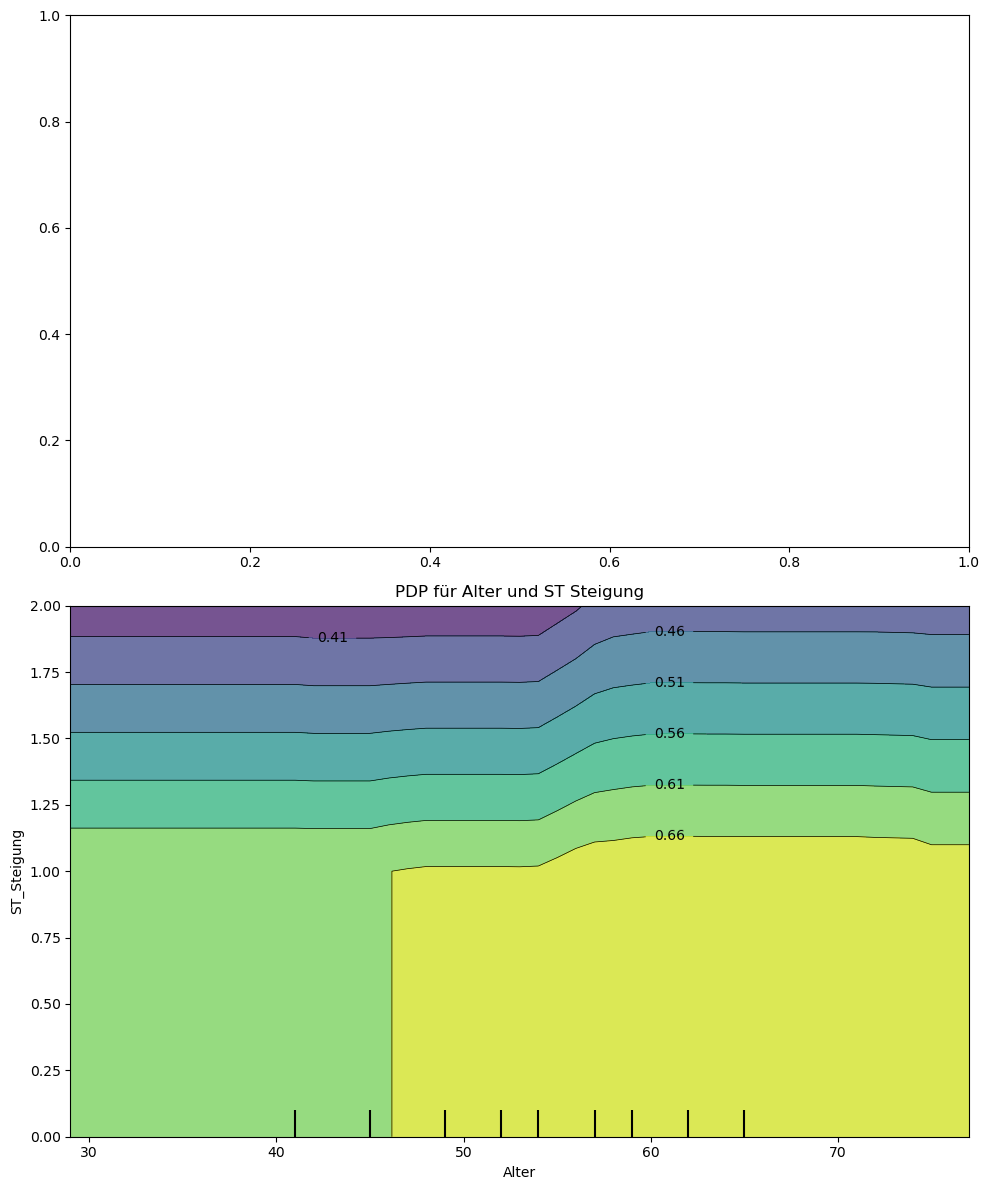

In [136]:
# Ihre Feature-Namen
feature_names = ["Alter", "Geschlecht", "Typ_Brustschmerz", "Ruhender_Blutdruck", "Cholesterin", "Nüchterner_Blutzucker", "Ruhe-EKG", "Max_Herzrate", "ExcerciseAngina", "Oldpeak", "ST_Steigung"]

# Indizes der Features
alter_index = feature_names.index("Alter")
geschlecht_index = feature_names.index("Geschlecht")
cholesterin_index = feature_names.index("Cholesterin")
ST_Steigung_index = feature_names.index("ST_Steigung")
# Erstellung der Partial Dependence Plots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# # PDP für Alter und Geschlecht
# PartialDependenceDisplay.from_estimator(
#     model_rf, X_train_rf, features=[(alter_index, geschlecht_index)],
#     feature_names=feature_names, ax=axs[0])
# axs[0].set_title("PDP für Alter und Geschlecht")

# # PDP für Alter und Cholesterin
# PartialDependenceDisplay.from_estimator(
#     model_rf, X_train_rf, features=[(alter_index, cholesterin_index)],
#     feature_names=feature_names, ax=axs[1])
# axs[1].set_title("PDP für Alter und Cholesterin")

# PDP für Alter und Cholesterin
PartialDependenceDisplay.from_estimator(
    model_rf, X_train_rf, features=[(alter_index, ST_Steigung_index)],
    feature_names=feature_names, ax=axs[1])
axs[1].set_title("PDP für Alter und ST Steigung")


plt.tight_layout()
plt.show()


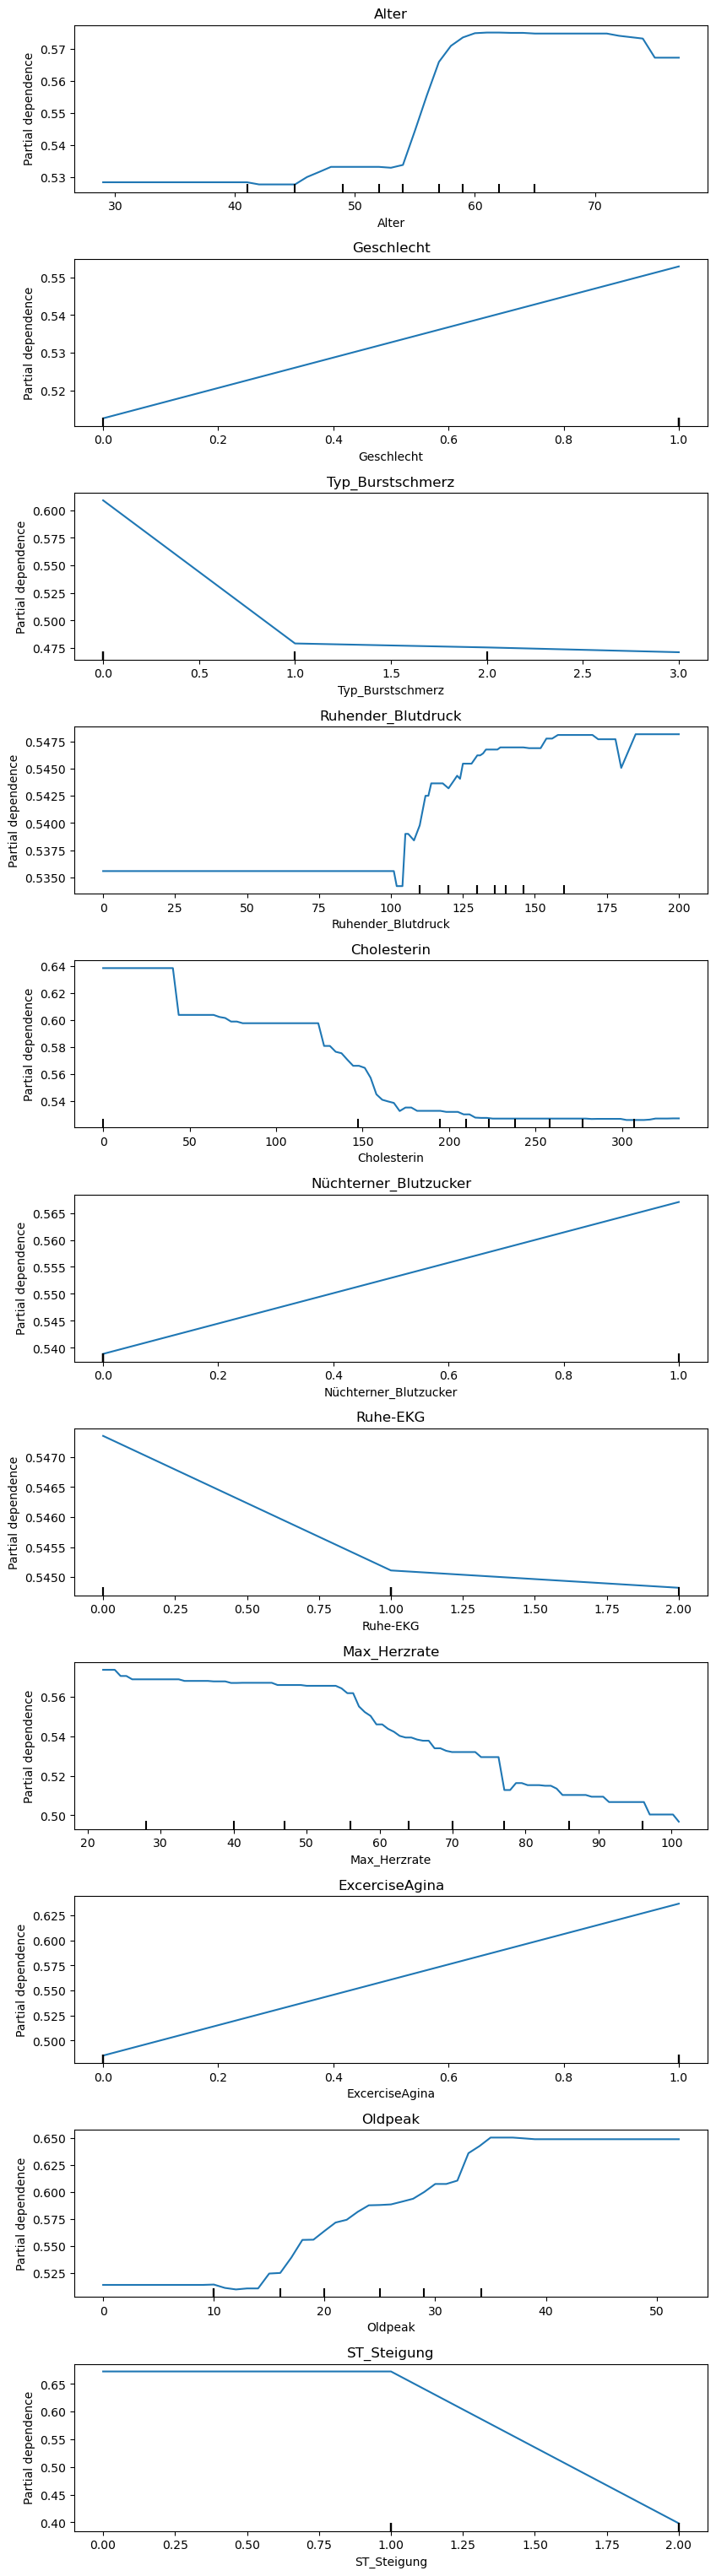

i: 10   feature:ST_Steigung


In [120]:
# Ihre Feature-Namen
feature_names = ["Alter", "Geschlecht", "Typ_Burstschmerz", "Ruhender_Blutdruck", "Cholesterin", "Nüchterner_Blutzucker", "Ruhe-EKG", "Max_Herzrate", "ExcerciseAgina", "Oldpeak", "ST_Steigung"]
# Plot der Partial Dependence Plots
fig_width = 10  # Breite des Plots
fig_height_per_subplot = 3  # Höhe pro Subplot
fig, ax = plt.subplots(len(feature_names), 1, figsize=(fig_width, fig_height_per_subplot * len(feature_names)))

# Erzeugen der Partial Dependence Plots
for i, feature in enumerate(feature_names):
    disp = PartialDependenceDisplay.from_estimator(model_rf, X_train_rf, features=[i],
                                                   feature_names=feature_names, ax=ax[i])
    ax[i].set_ylabel('')  # Entfernen der y-Achsen-Beschriftung
    ax[i].set_title(feature)  # Setzen des Feature-Namens als Titel

# Anpassung des Layouts
fig.subplots_adjust(top=0.95, bottom=0.05, left=0.2, right=0.95, hspace=0.4, wspace=0.2)

plt.show()
print(f'i: {i}   feature:{feature}')